# Assignment 4

1. Download the Employee Attrition Dataset
https://www.kaggle.com/datasets/patelprashant/employee-attrition
2. Perform Data Preprocessing
3. Model Building using Logistic Regression and Decision Tree and Random Forest
4. Calculate Performance metrics

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv("Employee-Attrition.csv")
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Handling the Null Values

In [5]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values to handle in this dataset.

## Data Visualization

In [6]:
corr = dataset.corr()
corr

C:\Users\Siri\AppData\Local\Temp\ipykernel_10152\897440734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


C:\Users\Siri\AppData\Local\Temp\ipykernel_10152\2676893432.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

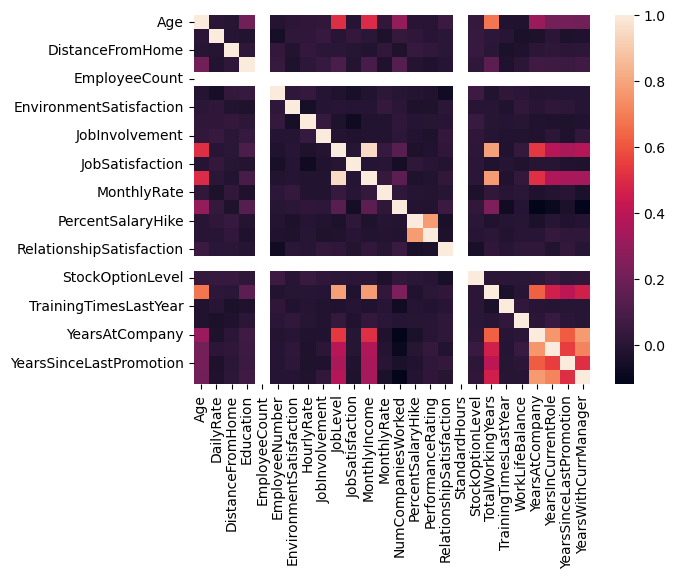

In [7]:
sns.heatmap(dataset.corr())

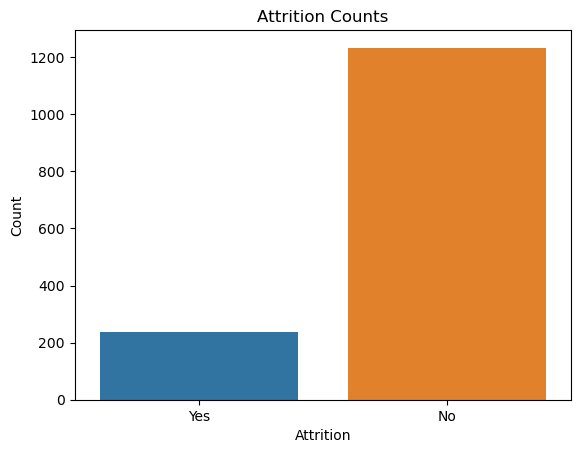

In [8]:
sns.countplot(x='Attrition', data=dataset)
plt.title('Attrition Counts')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

## Outlier Detection

<Axes: >

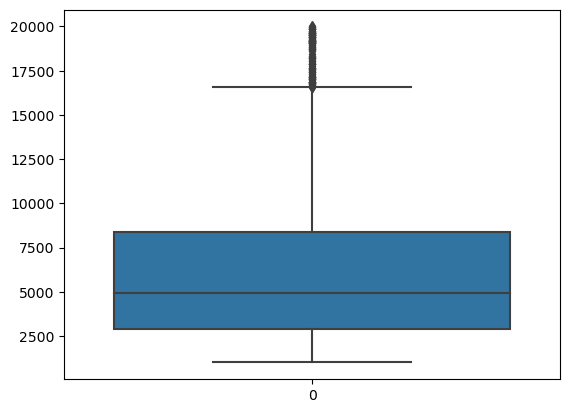

In [9]:
sns.boxplot(dataset["MonthlyIncome"])

<Axes: >

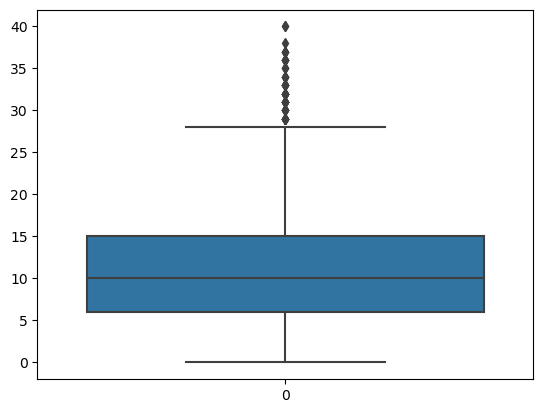

In [10]:
sns.boxplot(dataset["TotalWorkingYears"])

<Axes: >

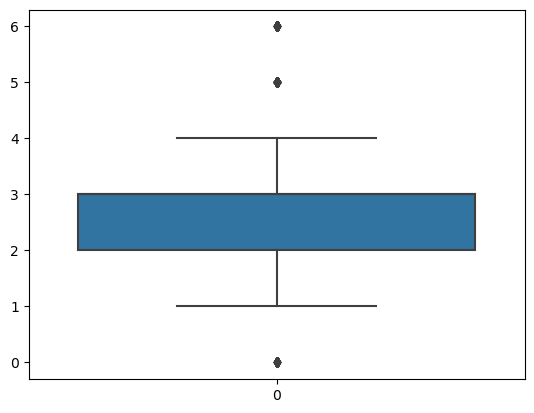

In [11]:
sns.boxplot(dataset["TrainingTimesLastYear"])

<Axes: >

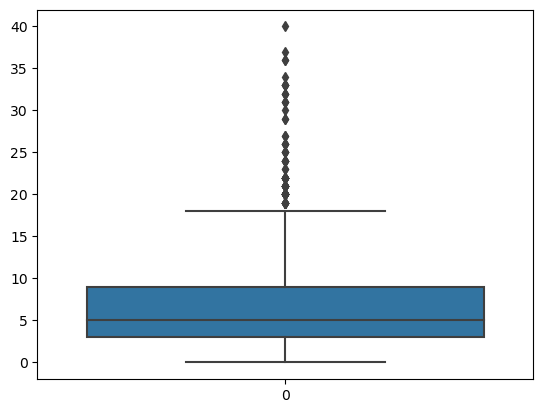

In [12]:
sns.boxplot(dataset["YearsAtCompany"])

<Axes: >

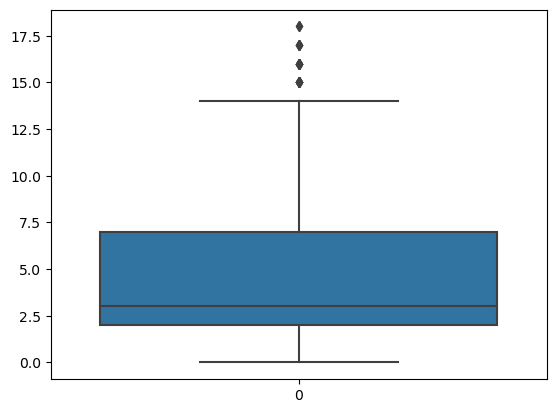

In [13]:
sns.boxplot(dataset["YearsInCurrentRole"])

<Axes: >

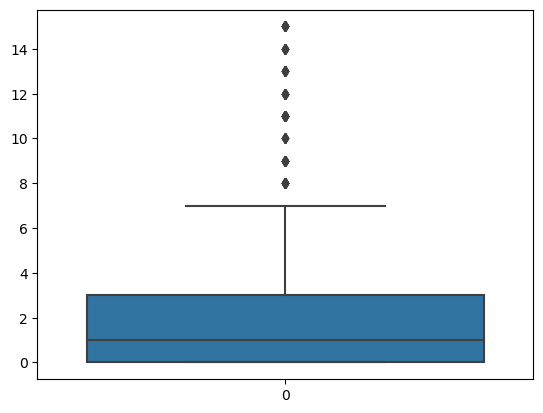

In [14]:
sns.boxplot(dataset["YearsSinceLastPromotion"])

<Axes: >

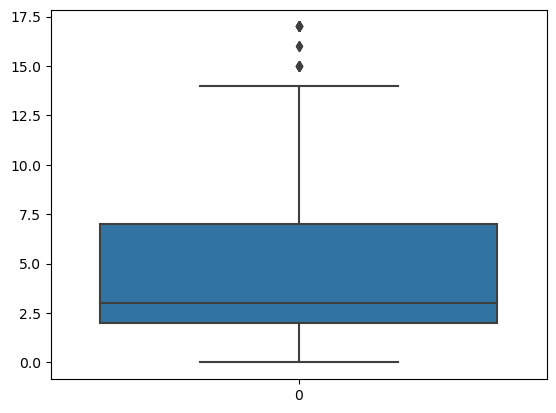

In [15]:
sns.boxplot(dataset["YearsWithCurrManager"])

In [16]:
print('Skewness value of MonthlyIncome: ',dataset['MonthlyIncome'].skew())
print('Skewness value of TotalWorkingYears: ',dataset['TotalWorkingYears'].skew())
print('Skewness value of TrainingTimesLastYear: ',dataset['TrainingTimesLastYear'].skew())
print('Skewness value of YearsAtCompany: ',dataset['YearsAtCompany'].skew())
print('Skewness value of YearsInCurrentRole: ',dataset['YearsInCurrentRole'].skew())
print('Skewness value of YearsSinceLastPromotion: ',dataset['YearsSinceLastPromotion'].skew())
print('Skewness value of YearsWithCurrManager: ',dataset['YearsWithCurrManager'].skew())

Skewness value of MonthlyIncome:  1.3698166808390662
Skewness value of TotalWorkingYears:  1.1171718528128527
Skewness value of TrainingTimesLastYear:  0.5531241710537028
Skewness value of YearsAtCompany:  1.7645294543422085
Skewness value of YearsInCurrentRole:  0.9173631562908262
Skewness value of YearsSinceLastPromotion:  1.9842899833524859
Skewness value of YearsWithCurrManager:  0.8334509919918475


The skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers.

Hence we consider only _YearsAtCompany_ and _YearsSinceLastPromotion_ for outlier correction.

In [17]:
Q1 = dataset.YearsAtCompany.quantile(0.25)
Q3 = dataset.YearsAtCompany.quantile(0.75)
print("The value of Q1:", Q1)
print("The value of Q3:", Q3)

The value of Q1: 3.0
The value of Q3: 9.0


In [18]:
IQR = Q3 - Q1
IQR

6.0

In [19]:
Upper_Limit = Q3 + 1.5*IQR
print("The Upper Limit is:", Upper_Limit)

The Upper Limit is: 18.0


In [20]:
Lower_Limit = Q1 - 1.5*IQR
print("The Lower Limit is:", Lower_Limit)

The Lower Limit is: -6.0


In [21]:
dataset["YearsAtCompany"].median()

5.0

In [22]:
dataset['YearsAtCompany'] = np.where(dataset['YearsAtCompany'] > Upper_Limit, Upper_Limit, np.where(dataset['YearsAtCompany'] < Lower_Limit, Lower_Limit,dataset['YearsAtCompany']))

<Axes: >

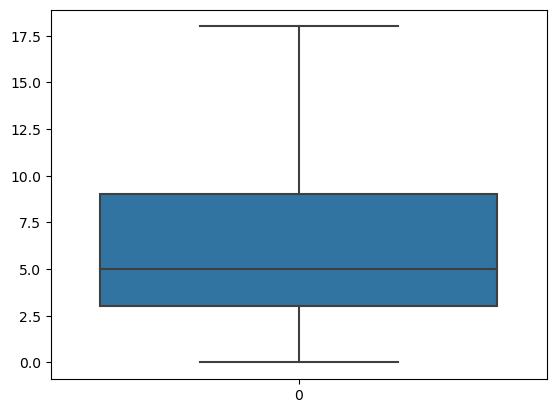

In [23]:
sns.boxplot(dataset["YearsAtCompany"])

As we can see, there are no outliers left in _YearsAtCompany_.

In [24]:
Q1 = dataset.YearsSinceLastPromotion.quantile(0.25)
Q3 = dataset.YearsSinceLastPromotion.quantile(0.75)
print("The value of Q1:", Q1)
print("The value of Q3:", Q3)

The value of Q1: 0.0
The value of Q3: 3.0


In [25]:
IQR = Q3 - Q1
IQR

3.0

In [26]:
Upper_Limit = Q3 + 1.5*IQR
print("The Upper Limit is:", Upper_Limit)

The Upper Limit is: 7.5


In [27]:
Lower_Limit = Q1 - 1.5*IQR
print("The Lower Limit is:", Lower_Limit)

The Lower Limit is: -4.5


In [28]:
dataset["YearsSinceLastPromotion"].median()

1.0

In [29]:
dataset['YearsSinceLastPromotion'] = np.where(dataset['YearsSinceLastPromotion'] > Upper_Limit, Upper_Limit, np.where(dataset['YearsSinceLastPromotion'] < Lower_Limit, Lower_Limit,dataset['YearsSinceLastPromotion']))

<Axes: >

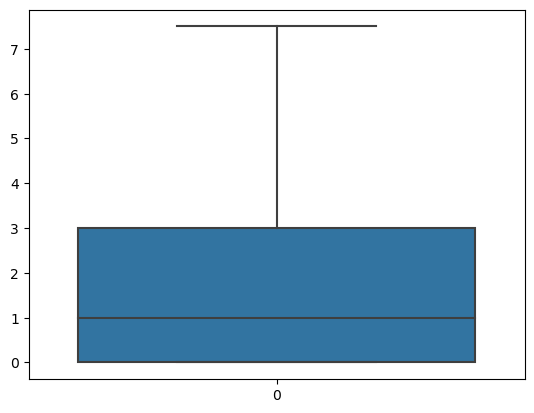

In [30]:
sns.boxplot(dataset["YearsSinceLastPromotion"])

As we can see, there are no outliers left in _YearsSinceLastPromotion_.

## Splitting Dependent and Independent variables

In [31]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6.0,4,0.0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10.0,7,1.0,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0.0,0,0.0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8.0,7,3.0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2.0,2,2.0,2


In [32]:
Y = dataset["Attrition"]
print("Type of Y: ", type(Y))

Type of Y:  <class 'pandas.core.series.Series'>


In [33]:
X = dataset.drop("Attrition", axis=1)
print("Type of X: ", type(X))
print("Shape of X: ", X.shape)

Type of X:  <class 'pandas.core.frame.DataFrame'>
Shape of X:  (1470, 34)


## Encoding the categorical data

In [34]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [35]:
Y = LE.fit_transform(Y)
Y

array([1, 0, 1, ..., 0, 0, 0])

In [36]:
X["BusinessTravel"] = LE.fit_transform(X["BusinessTravel"])
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6.0,4,0.0,5
1,49,1,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10.0,7,1.0,7
2,37,2,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0.0,0,0.0,0
3,33,1,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8.0,7,3.0,0
4,27,2,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2.0,2,2.0,2


In [37]:
X["Department"] = LE.fit_transform(X["Department"])
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6.0,4,0.0,5
1,49,1,279,1,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10.0,7,1.0,7
2,37,2,1373,1,2,2,Other,1,4,4,...,2,80,0,7,3,3,0.0,0,0.0,0
3,33,1,1392,1,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8.0,7,3.0,0
4,27,2,591,1,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2.0,2,2.0,2


In [38]:
X["EducationField"] = LE.fit_transform(X["EducationField"])
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6.0,4,0.0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10.0,7,1.0,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0.0,0,0.0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8.0,7,3.0,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2.0,2,2.0,2


In [39]:
X["Gender"] = LE.fit_transform(X["Gender"])
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6.0,4,0.0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10.0,7,1.0,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0.0,0,0.0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8.0,7,3.0,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2.0,2,2.0,2


In [40]:
X["JobRole"] = LE.fit_transform(X["JobRole"])
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6.0,4,0.0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10.0,7,1.0,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0.0,0,0.0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8.0,7,3.0,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2.0,2,2.0,2


In [41]:
X["MaritalStatus"] = LE.fit_transform(X["MaritalStatus"])
X["Over18"] = LE.fit_transform(X["Over18"])
X["OverTime"] = LE.fit_transform(X["OverTime"])
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6.0,4,0.0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10.0,7,1.0,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0.0,0,0.0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8.0,7,3.0,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2.0,2,2.0,2


## Feature Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler
MS = MinMaxScaler()

In [43]:
X_Scaled = pd.DataFrame(MS.fit_transform(X), columns = X.columns)
X_Scaled.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.0,0.000000,0.333333,...,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.333333,0.222222,0.000000,0.294118
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.0,0.000484,0.666667,...,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.555556,0.388889,0.133333,0.411765
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,0.0,0.001451,1.000000,...,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.000000,0.000000,0.000000,0.000000
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,0.0,0.001935,1.000000,...,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.444444,0.388889,0.400000,0.000000
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.0,0.002903,0.000000,...,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.111111,0.111111,0.266667,0.117647


## Splitting the data into Train and Test sets

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_Scaled, Y, test_size = 0.2, random_state = 0)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (1176, 34)
Shape of x_test: (294, 34)
Shape of y_train: (1176,)
Shape of y_test: (294,)


# Model Building - Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [46]:
model.fit(x_train,y_train)

LogisticRegression()

In [47]:
pred = model.predict(x_test)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

## Evaluation of classification model

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
accuracy_score(y_test,pred)

0.8809523809523809

In [49]:
confusion_matrix(y_test,pred)

array([[242,   3],
       [ 32,  17]], dtype=int64)

In [50]:
pd.crosstab(y_test,pred)

col_0,0,1
row_0,,
0,242,3
1,32,17


In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       245
           1       0.85      0.35      0.49        49

    accuracy                           0.88       294
   macro avg       0.87      0.67      0.71       294
weighted avg       0.88      0.88      0.86       294



In [52]:
probability = model.predict_proba(x_test)[:,1]
probability

array([0.16214993, 0.19568726, 0.32730305, 0.07399758, 0.63648544,
       0.05993119, 0.57396364, 0.07059882, 0.0069724 , 0.40094729,
       0.04954972, 0.31526515, 0.02015624, 0.69153505, 0.21683621,
       0.03985801, 0.10589745, 0.16743481, 0.04699513, 0.24611361,
       0.22837876, 0.01954238, 0.07294048, 0.05578884, 0.57690143,
       0.39909774, 0.06804766, 0.04074959, 0.68125777, 0.06570078,
       0.01677552, 0.03187309, 0.08344267, 0.21267087, 0.0796387 ,
       0.03972131, 0.07058332, 0.06876665, 0.04077697, 0.05029587,
       0.03008404, 0.02000369, 0.0174147 , 0.01509035, 0.02622679,
       0.48713222, 0.42584476, 0.00311982, 0.73614782, 0.51713362,
       0.12164215, 0.47100668, 0.09830935, 0.26263571, 0.66910225,
       0.2814314 , 0.01989752, 0.31594609, 0.02811702, 0.16533061,
       0.02107653, 0.22256587, 0.09840617, 0.03700033, 0.39996809,
       0.03599934, 0.27781115, 0.15431363, 0.09949963, 0.09161348,
       0.06137291, 0.2996488 , 0.07503044, 0.07259495, 0.12474

In [53]:
fpr,tpr,threshsholds = roc_curve(y_test,probability)

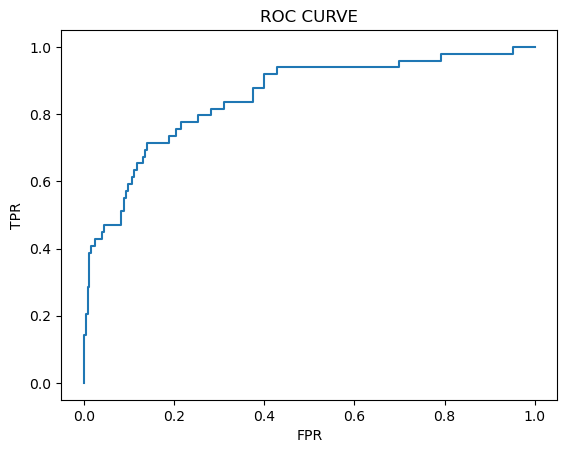

In [54]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

# Model Building - Decision tree classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [56]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
pred = dtc.predict(x_test)

In [58]:
pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

## Evaluation of classification model

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
accuracy_score(y_test,pred)

0.7721088435374149

In [60]:
confusion_matrix(y_test,pred)

array([[210,  35],
       [ 32,  17]], dtype=int64)

In [61]:
pd.crosstab(y_test,pred)

col_0,0,1
row_0,,
0,210,35
1,32,17


In [62]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       245
           1       0.33      0.35      0.34        49

    accuracy                           0.77       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.78      0.77      0.77       294



In [63]:
probability=dtc.predict_proba(x_test)[:,1]
probability

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0.

In [64]:
fpr,tpr,threshsholds = roc_curve(y_test,probability)

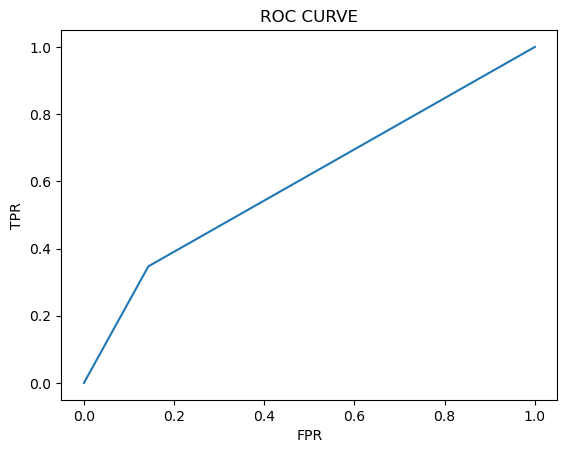

In [65]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

[Text(0.3192657653443114, 0.9705882352941176, 'x[27] <= 0.038\ngini = 0.269\nsamples = 1176\nvalue = [988, 188]'),
 Text(0.0718562874251497, 0.9117647058823529, 'x[16] <= 0.75\ngini = 0.5\nsamples = 78\nvalue = [39, 39]'),
 Text(0.04491017964071856, 0.8529411764705882, 'x[4] <= 0.554\ngini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(0.029940119760479042, 0.7941176470588235, 'x[15] <= 0.167\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.017964071856287425, 0.7352941176470589, 'x[16] <= 0.25\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.011976047904191617, 0.6764705882352942, 'x[2] <= 0.175\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.005988023952095809, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.017964071856287425, 0.6176470588235294, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.023952095808383235, 0.6764705882352942, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.041916167664670656, 0.7352941176470589, 'x[19] <= 0.0

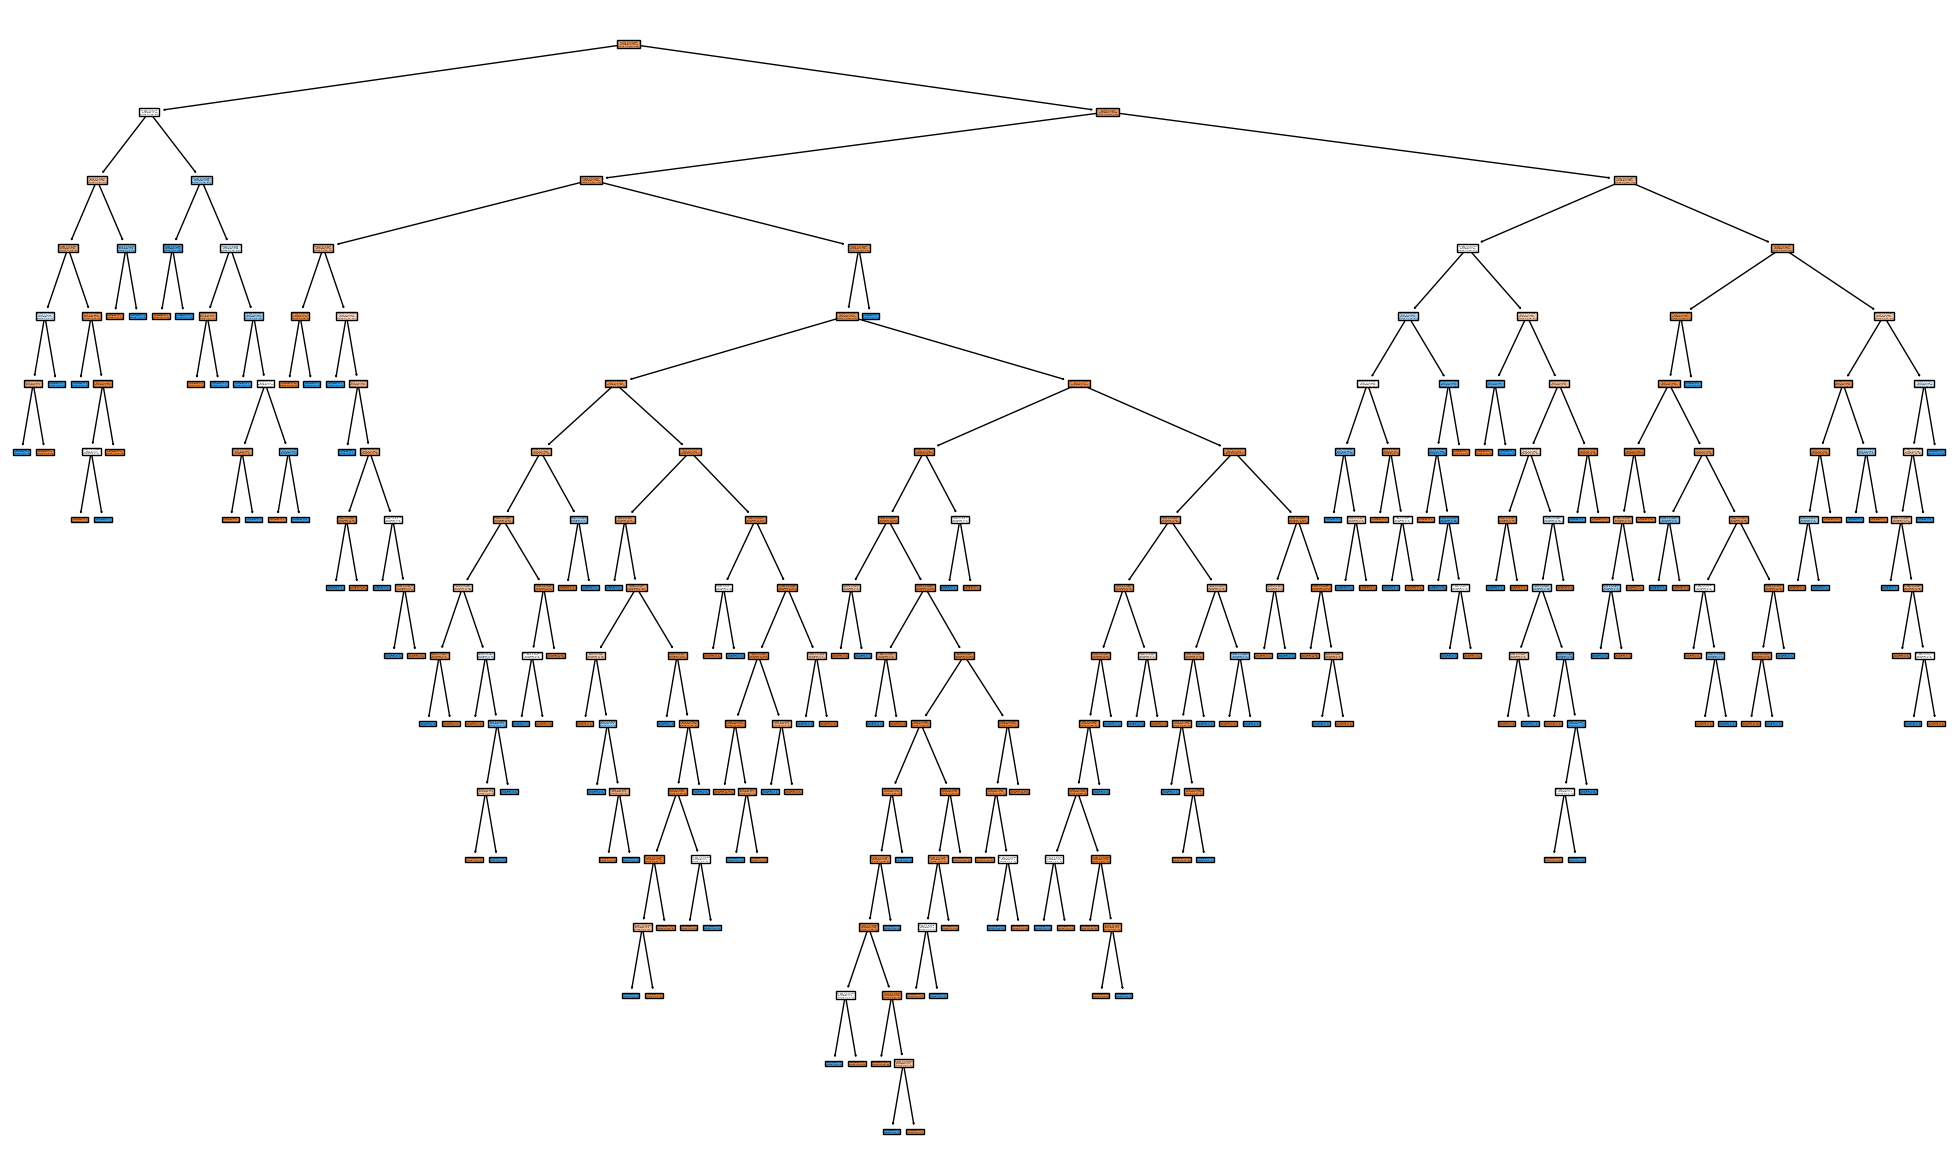

In [66]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtc,filled=True)

In [67]:
from sklearn.model_selection import GridSearchCV
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [68]:
grid_search=GridSearchCV(estimator=dtc,param_grid=parameter,cv=5,scoring="accuracy")

In [69]:
grid_search.fit(x_train,y_train)

C:\Users\Siri\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Siri\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Siri\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Siri\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Siri\anaconda3\Lib\site-packages\sk

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [70]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [71]:
dtc_cv=DecisionTreeClassifier(criterion= 'entropy',
 max_depth=3,
 max_features='sqrt',
 splitter='best')
dtc_cv.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [72]:
pred = dtc_cv.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       245
           1       0.50      0.08      0.14        49

    accuracy                           0.83       294
   macro avg       0.67      0.53      0.52       294
weighted avg       0.79      0.83      0.78       294



# Model Building - Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
random_forest_model = RandomForestClassifier(random_state=42)

In [74]:
random_forest_model.fit(x_train, y_train)
random_forest_predictions = random_forest_model.predict(x_test)

In [75]:
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_report = classification_report(y_test, random_forest_predictions)

print("Random Forest Model Accuracy:", random_forest_accuracy)
print("Random Forest Model Classification Report:")
print(random_forest_report)

Random Forest Model Accuracy: 0.8469387755102041
Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       245
           1       0.70      0.14      0.24        49

    accuracy                           0.85       294
   macro avg       0.78      0.57      0.58       294
weighted avg       0.83      0.85      0.80       294

